# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Ks** : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# Input

* **Sector: 19**
  - Period: 3.7701504059
  - Tdepth: 0.0617433590**2
  
* **Sector: 20**
  - Period: 3.7701915937
  - Tdepth: 0.0617074802**2

In [2]:
ID = 396740648
sectors = np.array([20])

period = 3.7701504059
tdepth = 0.0617433590**2

lc = pd.read_csv("TOI_1694_20.csv", header=None)
contrastcurve_file = "Gemini_8m_g.csv"

band = 'Vis'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

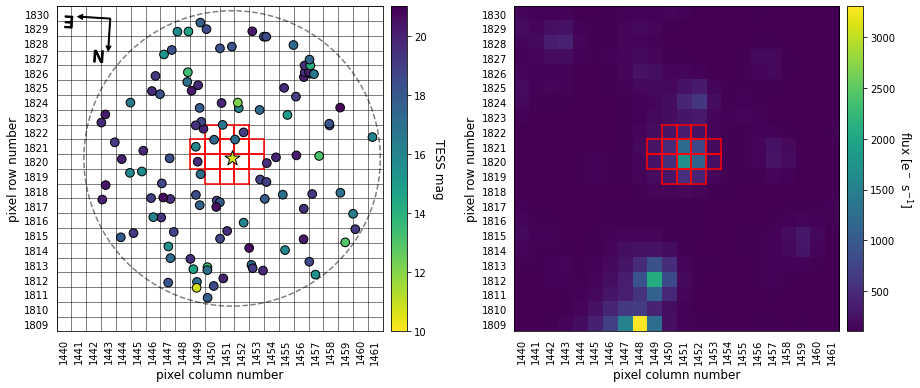

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,396740648,10.7424,9.957,9.473,9.425,97.748211,66.360683,0.845000,0.818330,5058.0,7.991820,0.000,0.000
1,396740644,17.0917,15.418,14.811,14.701,97.746469,66.353226,0.428933,0.433695,3379.0,1.880790,26.963,185.353
2,396776946,17.2693,16.343,15.740,15.611,97.766366,66.353834,0.780000,0.781313,4811.0,0.346678,35.986,133.244
3,705048925,18.9691,NaN,NaN,NaN,97.738805,66.350222,NaN,NaN,NaN,0.497528,40.034,199.835
4,705048928,19.6791,NaN,NaN,NaN,97.780705,66.362842,NaN,NaN,NaN,0.459126,47.543,80.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,705049352,19.0938,NaN,NaN,NaN,97.627053,66.385142,NaN,NaN,5984.0,-0.125661,195.732,296.790
108,396776978,17.7244,16.118,15.545,15.434,97.786078,66.308430,0.352015,0.365433,3500.0,1.704840,195.910,163.764
109,396776908,18.1556,16.525,15.880,15.362,97.801955,66.410835,NaN,NaN,3838.0,1.368760,196.478,23.208
110,396740669,15.4459,14.053,13.329,13.140,97.662289,66.403921,0.644199,0.673136,3571.0,2.002240,198.962,321.515


In [4]:
ap = np.array([ [1450, 1819], [1451, 1819], [1452, 1819], [1449, 1820], [1450, 1820],
                [1451, 1820], [1452, 1820], [1453, 1820], [1449, 1821], [1450, 1821],
                [1451, 1821], [1452, 1821], [1453, 1821], [1450, 1822], [1451, 1822],
                [1452, 1822]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,396740648,10.7424,9.957,9.473,9.425,97.748211,66.360683,0.845000,0.818330,5058.0,7.991820,0.000,0.000,9.803544e-01,0.003826
1,396740644,17.0917,15.418,14.811,14.701,97.746469,66.353226,0.428933,0.433695,3379.0,1.880790,26.963,185.353,2.521466e-03,0.000000
2,396776946,17.2693,16.343,15.740,15.611,97.766366,66.353834,0.780000,0.781313,4811.0,0.346678,35.986,133.244,2.036783e-03,0.000000
3,705048925,18.9691,NaN,NaN,NaN,97.738805,66.350222,NaN,NaN,NaN,0.497528,40.034,199.835,3.100037e-04,0.000000
4,705048928,19.6791,NaN,NaN,NaN,97.780705,66.362842,NaN,NaN,NaN,0.459126,47.543,80.575,1.641701e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,705049352,19.0938,NaN,NaN,NaN,97.627053,66.385142,NaN,NaN,5984.0,-0.125661,195.732,296.790,1.470675e-27,0.000000
108,396776978,17.7244,16.118,15.545,15.434,97.786078,66.308430,0.352015,0.365433,3500.0,1.704840,195.910,163.764,9.705054e-24,0.000000
109,396776908,18.1556,16.525,15.880,15.362,97.801955,66.410835,NaN,NaN,3838.0,1.368760,196.478,23.208,1.151751e-25,0.000000
110,396740669,15.4459,14.053,13.329,13.140,97.662289,66.403921,0.644199,0.673136,3571.0,2.002240,198.962,321.515,2.094961e-27,0.000000


# Ploting CC File

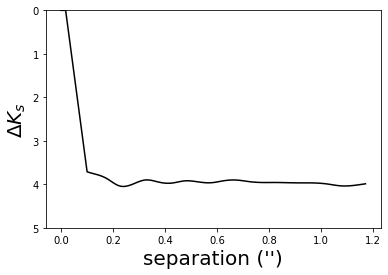

In [6]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(5,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [ ]:
%%time

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)
    
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)

In [9]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.0001743966190588253
NFPP =  9.625179230700263e-100


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,396740648,TP,0.845000,0.818330,3.770177,89.433739,0.106995,0.116615,141.226544,5.318765,0.000000,0.000000,8.666889e-01
1,396740648,EB,0.845000,0.818330,3.770177,87.106503,0.238190,0.814969,188.855519,0.000000,0.114784,0.140243,1.892341e-23
2,396740648,EBx2P,0.845000,0.818330,7.540353,86.940206,0.875802,0.522784,176.066024,0.000000,0.809507,0.818330,1.886207e-55
3,396740648,PTP,0.845000,0.818330,3.770177,89.635022,0.085238,0.158293,243.721546,5.599852,0.000000,0.000000,5.696775e-03
4,396740648,PEB,0.845000,0.818330,3.770177,84.739286,0.217688,0.846821,146.266940,0.000000,0.126916,0.155465,4.944691e-168
5,396740648,PEBx2P,0.845000,0.818330,7.540353,86.971847,0.902844,0.519508,179.827558,0.000000,0.821614,0.818330,5.598458e-43
6,396740648,STP,0.830125,0.818330,3.770177,89.803467,0.042221,0.079361,223.705455,7.758168,0.000000,0.000000,1.743959e-04
7,396740648,SEB,0.513808,0.519132,3.770177,88.403145,0.156880,0.740913,152.635650,0.000000,0.104816,0.126814,3.635874e-14
8,396740648,SEBx2P,0.514872,0.520373,7.540353,88.085121,0.774645,0.561067,188.157574,0.000000,0.489269,0.490498,1.060549e-17
9,396740648,DTP,0.845000,0.818330,3.770177,88.790309,0.233413,0.121061,155.819896,5.384881,0.000000,0.000000,1.274400e-01


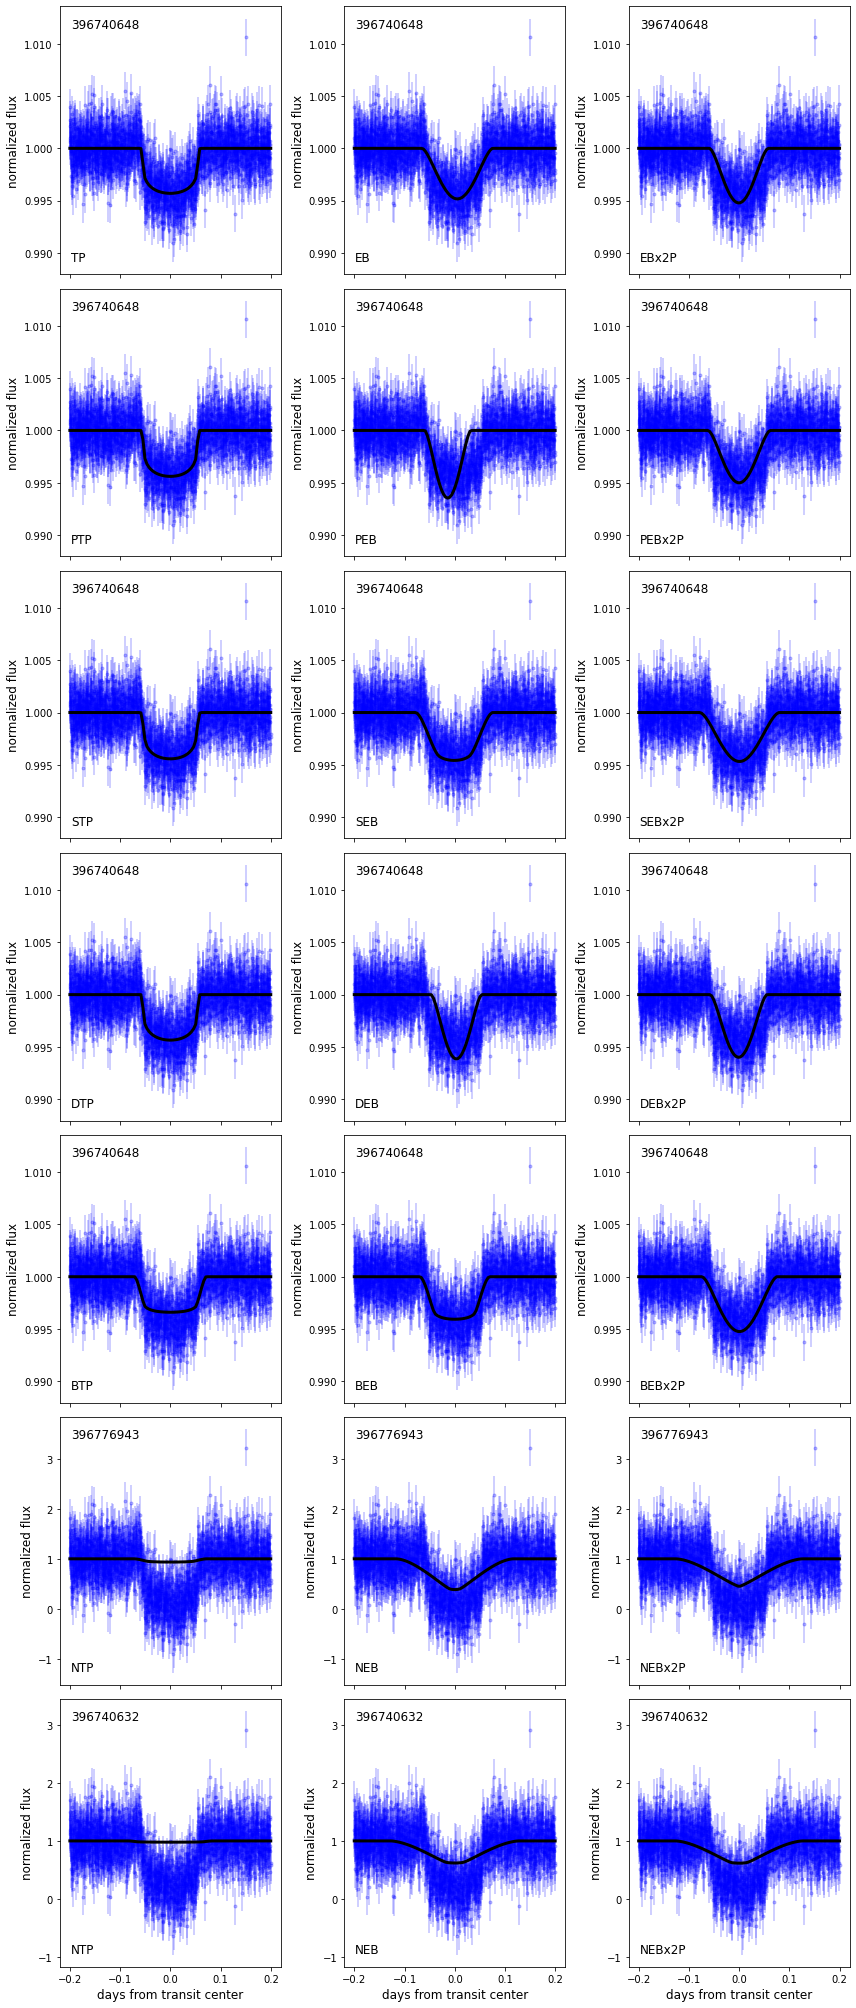

In [10]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

# Output

## Sector 19

In [ ]:
# Sector 19
# Filter: Ks
FPP_19K = []
NFPP_19K = []

print("Sector 19")
print("Filter: Ks")
print("   FPP  = ",np.mean(FPP_19K),"+/-",np.std(FPP_19K))
print("   NFPP = ",np.mean(NFPP_19K),"+/-",np.std(NFPP_19K))

In [ ]:
# Sector 19
# Filter: 832nm
FPP_19832nm = []
NFPP_19832nm = []

print("Sector 19")
print("Filter: 832nm")
print("   FPP  = ",np.mean(FPP_19832nm),"+/-",np.std(FPP_19832nm))
print("   NFPP = ",np.mean(NFPP_19832nm),"+/-",np.std(NFPP_19832nm))

In [ ]:
# Sector 19
# Filter: 562nm
FPP_19562nm = []
NFPP_19562nm = []

print("Sector 19")
print("Filter: 562nm")
print("   FPP  = ",np.mean(FPP_19562nm),"+/-",np.std(FPP_19562nm))
print("   NFPP = ",np.mean(NFPP_19562nm),"+/-",np.std(NFPP_19562nm))

## Sector 20

In [ ]:
# Sector 20
# Filter: Ks
FPP_20K = []
NFPP_20K = []

print("Sector 20")
print("Filter: Ks")
print("   FPP  = ",np.mean(FPP_20K),"+/-",np.std(FPP_20K))
print("   NFPP = ",np.mean(NFPP_20K),"+/-",np.std(NFPP_20K))

In [ ]:
# Sector 20
# Filter: 832nm
FPP_20832nm = []
NFPP_20832nm = []

print("Sector 20")
print("Filter: 832nm")
print("   FPP  = ",np.mean(FPP_20832nm),"+/-",np.std(FPP_20832nm))
print("   NFPP = ",np.mean(NFPP_20832nm),"+/-",np.std(NFPP_20832nm))

In [ ]:
# Sector 20
# Filter: 562nm
FPP_20562nm = []
NFPP_20562nm = []

print("Sector 20")
print("Filter: 562nm")
print("   FPP  = ",np.mean(FPP_20562nm),"+/-",np.std(FPP_20562nm))
print("   NFPP = ",np.mean(NFPP_20562nm),"+/-",np.std(NFPP_20562nm))